In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re           
import os
from bs4 import BeautifulSoup

In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense,GRU, Concatenate, TimeDistributed, Bidirectional,Dropout
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/sample_data/Reviews.csv",quoting=3, error_bad_lines=False,warn_bad_lines=False)
data[['Text','Summary']].sample(5)

,Text,Summary
254515,"""Just wanted to give everyone a heads up that ...",Love the coffee but 50 in a box.
94160,"""This is a great deal for 6 packages of salami...",Great Salami for the price
38355,to my knowledge the only producer of tinned br...,BETTER THAN YOUR MOTHER'S
325858,"""The only reason I did not give this product a...",Yummy
118334,I love almost all of the stevia flavors. They ...,Love Stevia!


In [ ]:
len(data)

363627

In [ ]:
data.drop_duplicates(subset=['Text'],inplace=True)  
data.dropna(axis=0,inplace=True)

In [ ]:
len(data)

253176

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
data['Text'][:5]

0    I have bought several of the Vitality canned d...
1    "Product arrived labeled as Jumbo Salted Peanu...
2    If you are looking for the secret ingredient i...
3    Right now I'm mostly just sprouting this so my...
4    This is a very healthy dog food. Good for thei...
Name: Text, dtype: object

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                 
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
cleaned_text[:5]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'right mostly sprouting cats eat grass love rotate around wheatgrass rye',
 'healthy dog food good digestion also good small puppies dog eats required amount every feeding']

In [ ]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(summary_cleaner(t))

data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary
data['cleaned_summary'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

In [ ]:
data['cleaned_summary'] = data['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [ ]:
data['cleaned_text'][:5]

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts p...
2    looking secret ingredient robitussin believe f...
3    right mostly sprouting cats eat grass love rot...
4    healthy dog food good digestion also good smal...
Name: cleaned_text, dtype: object

In [ ]:
data['cleaned_summary'][:5]

0    _START_ good quality dog food  _END_
1        _START_ not as advertised  _END_
2           _START_ cough medicine  _END_
3               _START_ yay barley  _END_
4         _START_ healthy dog food  _END_
Name: cleaned_summary, dtype: object

In [ ]:
for i in range(5):
    print("Review:",data['cleaned_text'][i])
    print("Summary:",data['cleaned_summary'][i])
    print("\n")

Review: bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
Summary: _START_ good quality dog food  _END_


Review: product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
Summary: _START_ not as advertised  _END_


Review: looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal
Summary: _START_ cough medicine  _END_


Review: right mostly sprouting cats eat grass love rotate around wheatgrass rye
Summary: _START_ yay barley  _END_


Review: healthy dog food good digestion also good small puppies dog eats required amount every feeding
Summary: _START_ healthy dog food  _END_




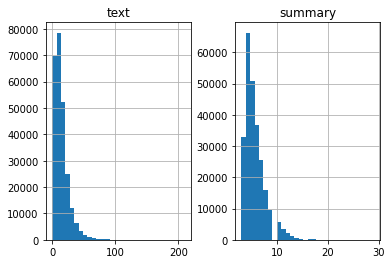

In [ ]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [ ]:
max_len_text=80 
max_len_summary=10
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(data['cleaned_text'],data['cleaned_summary'],test_size=0.1,random_state=0,shuffle=True)

In [ ]:
x_tr

309991    tropic bee offers various honeys mixed bit dif...
189743    dark chili powder much depth flavor regular ch...
208947                                 excellent soup bases
263889                first discovered tea local coffeeshop
46176     great product use coconut oil moisturizer ever...
                                ...                        
242106    making wedding cake bride wanted passion fruit...
148496    texas pete hot sauce south ubiquitous every ty...
237674                              purchase candied citron
53632     need decrease caffeine intake home drink soda ...
275631    quality taste item consistant packet oacket ot...
Name: cleaned_text, Length: 226596, dtype: object

In [ ]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [ ]:
x_tr[0]

array([14056,  3241,  1427,   931,  6471,   416,   102,    81,  2060,
        1067,     8,  2189,  2154,   958,   135,   113,    59,  1054,
          10,   928,   445,  1673,  1960,   117,   244,  5741,  1302,
        2374,    67,   648,  7023,    76,  2154,   958,   422,   299,
           3,     8,  6034,  5317,   210,  1167,     9, 17572,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0],
      dtype=int32)

In [ ]:
x_tr.shape

(226596, 80)

In [ ]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [ ]:
print(x_voc_size)
print(y_voc_size)

53571
23847


In [ ]:
y_tr[0]

array([  1,  23, 170,   2,   0,   0,   0,   0,   0,   0], dtype=int32)

In [ ]:
import joblib
joblib.dump(x_tokenizer,'x_tokenizer.pkl')
joblib.dump(y_tokenizer,'y_tokenizer.pkl')

['y_tokenizer.pkl']

In [ ]:
from keras import backend as K 
K.clear_session() 
latent_dim = 500 

In [ ]:
# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs)    


#LSTM 1 
encoder_lstm1 = Bidirectional(LSTM(latent_dim,return_sequences=True,return_state=True))
encoder_output1, state_h1, state_c1 , backward_state_h1, backward_state_c1 = encoder_lstm1(enc_emb)  
encoder_output_dropout_01 = Dropout(0.3)(encoder_output1)


#LSTM 2 
encoder_lstm2 = Bidirectional(LSTM(latent_dim,return_sequences=True,return_state=True))
encoder_output2, state_h2, state_c2 , backward_state_h2, backward_state_c2 = encoder_lstm2(encoder_output_dropout_01)  
encoder_output_dropout_02 = Dropout(0.3)(encoder_output2)

#LSTM b2 
encoder_lstm3 =Bidirectional(LSTM(latent_dim,return_sequences=True,return_state=True))
encoder_output, state_h3, state_c3 ,backward_state_h3, backward_state_c3 = encoder_lstm3(encoder_output_dropout_02)  
encoder_state_h = Concatenate()([state_h3, backward_state_h3])
encoder_state_c = Concatenate()([state_c3, backward_state_c3])

In [ ]:
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

In [ ]:
decoder_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True)
decoder_output, decoder_state_h, decoder_state_c= decoder_lstm(dec_emb, initial_state=[encoder_state_h,encoder_state_c])

In [ ]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_output, decoder_output]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_output, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_dense_output = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_dense_output) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 80, 500)      26785500    input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   [(None, 80, 1000), ( 4004000     embedding[0][0]                  
__________________________________________________________________________________________________
dropout (Dropout)               (None, 80, 1000)     0           bidirectional[0][0]              
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:

x_tr
y_tr[:5,:-1]
y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:]

array([[[  23],
        [ 170],
        [   2],
        ...,
        [   0],
        [   0],
        [   0]],

       [[2262],
        [1669],
        [   2],
        ...,
        [   0],
        [   0],
        [   0]],

       [[  11],
        [   4],
        [ 255],
        ...,
        [  19],
        [   3],
        [   2]],

       ...,

       [[2887],
        [ 158],
        [   2],
        ...,
        [   0],
        [   0],
        [   0]],

       [[  14],
        [5297],
        [ 234],
        ...,
        [   2],
        [   0],
        [   0]],

       [[4008],
        [2288],
        [  20],
        ...,
        [   0],
        [   0],
        [   0]]], dtype=int32)

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=200,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/200
443/443 [==============================] - 1361s 3s/step - loss: 3.1314 - val_loss: 2.2654
Epoch 2/200
443/443 [==============================] - 1368s 3s/step - loss: 2.2480 - val_loss: 2.0985
Epoch 3/200
443/443 [==============================] - 1370s 3s/step - loss: 2.0498 - val_loss: 1.9988
Epoch 4/200
443/443 [==============================] - 1346s 3s/step - loss: 1.8954 - val_loss: 1.9332
Epoch 5/200
443/443 [==============================] - 1374s 3s/step - loss: 1.7670 - val_loss: 1.8944
Epoch 6/200
443/443 [==============================] - 1376s 3s/step - loss: 1.6496 - val_loss: 1.8735
Epoch 7/200
443/443 [==============================] - 1362s 3s/step - loss: 1.5459 - val_loss: 1.8649
Epoch 8/200
443/443 [==============================] - 1340s 3s/step - loss: 1.4504 - val_loss: 1.8662
Epoch 9/200
443/443 [==============================] - 1342s 3s/step - loss: 1.3616 - val_loss: 1.8796
Epoch 10/200
443/443 [==============================] - 1342s 3s/step - l

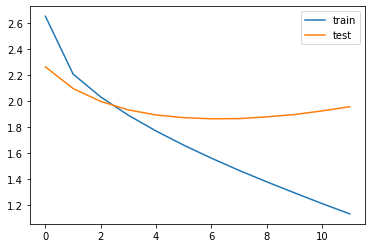

In [ ]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [ ]:
# Encoder Inference Model
encoder_model_inference = Model(encoder_inputs, [encoder_output, encoder_state_h,encoder_state_c])

# Decoder Inference
# Below tensors will hold the states of the previous time step
decoder_state_h = Input(shape=(latent_dim*2, ))
decoder_state_c = Input(shape=(latent_dim*2, ))
decoder_intermittent_state_input = Input(shape=(max_len_text, latent_dim*2))


# Get Embeddings of Decoder Sequence
decoder_embedding_inference = dec_emb_layer(decoder_inputs)

# Predict Next Word in Sequence, Set Initial State to State from Previous Time Step
decoder_output_inference, decoder_state_inference_h,decoder_state_inference_c = decoder_lstm(decoder_embedding_inference, initial_state=[decoder_state_h,decoder_state_c])

# Attention Inference
attention_layer = AttentionLayer()
attention_out_inference, attention_state_inference = attention_layer([decoder_intermittent_state_input, decoder_output_inference])
decoder_inference_concat = Concatenate(axis=-1)([decoder_output_inference, attention_out_inference])

# Dense Softmax Layer to Generate Prob. Dist. Over Target Vocabulary
decoder_output_inference = decoder_dense(decoder_inference_concat)

# Final Decoder Model
decoder_model_inference = Model([decoder_inputs, decoder_intermittent_state_input, decoder_state_h,decoder_state_c], 
                                [decoder_output_inference, decoder_state_inference_h,decoder_state_inference_c])

In [ ]:
encoder_model_inference.save('enc.h5')
decoder_model_inference.save('dec.h5')

In [ ]:
encoderSaved =  load_model('/content/enc.h5')
decoderSaved = load_model('/content/dec.h5', custom_objects={'AttentionLayer': AttentionLayer})

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_state_h , e_state_c = encoderSaved.predict(input_seq)
    # print('input_seq: {}, e_out: {} '.format(input_seq,e_out))
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, decoder_state_h,decoder_state_c = decoderSaved.predict([target_seq] + [e_out, e_state_h, e_state_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        # print("sampled_token:",sampled_token)
        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        # stop_condition = True
        # Update internal states
        e_state_h = decoder_state_h
        e_state_c = decoder_state_c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
columns=['original','predicted']
lst=[]
for i in range(0,20):
  print("Review:",seq2text(x_val[i]))
  original = seq2summary(y_val[i])
  predicted= decode_sequence(x_val[i].reshape(1,max_len_text))
  print("Original summary:",original)
  print("Predicted summary:",predicted)
  lst.append([original,predicted])
  print("\n")

Review: coffee great whole family enjoys way grandparents kids kitchen smells heavenly perk strong acidity right 
Original summary: wonderful chocolaty aroma 
Predicted summary:  great coffee


Review: purchased lavender put buckwheat hull pillow made purchased quite bit loose lavender france 
Original summary: ahhhh 
Predicted summary:  it is what it is


Review: using icecream tase great funny taste alchol tast extracts vanilla flavorings 
Original summary: great tast and fast service 
Predicted summary:  not for me


Review: things dont damn thing cat bad breath sure love eating also dont suggest giving cat box says something ridiculous like per serving want feed cat whole bag two weeks timeframe buy 
Original summary: my cat likes them 
Predicted summary:  my cat will not eat them


Review: wife love cakes betty crocker stores thanks amazon stock good price 
Original summary: not in stores 
Predicted summary:  great product


Review: nice taste mild nice way start morning love larg

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
newdf = pd.DataFrame(lst, columns=columns)
def bleu_scoring(row):

  reference = row['original']
  candidate = row['predicted']

  reference = [str(reference).split()]
  candidate = str(candidate).split()
  score = sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))

  return score

In [ ]:
newdf['bleu']= newdf.apply(lambda row: bleu_scoring(row), axis=1)

In [ ]:
newdf['bleu'].mean()

0.1066335876724248